<a href="https://colab.research.google.com/github/lifod/TSC/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%88%98%ED%95%99_k_NN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] 파일 업로드

In [1]:
from google.colab import files
uploaded=files.upload()

Saving kNN.csv to kNN.csv


#[2] 파일 읽어오기 및 데이터 객체 지정

In [2]:
import pandas as pd

df=pd.read_csv('kNN.csv',encoding='cp949')

df.head(7)

,classification,melting point,boiling point
0,ionic bond,712.00,1412.000
1,ionic bond,801.00,1413.000
2,ionic bond,776.00,1500.000
3,ionic bond,772.00,1935.000
4,covalent bond,-272.20,-268.928
5,covalent bond,0.00,100.000
6,covalent bond,-218.79,-182.950


In [3]:
x=df.values[:,1] 
y=df.values[:,2] 
print(type(x))

<class 'numpy.ndarray'>


In [4]:
data=[[a,b] for a,b in zip(x,y)]
print(data)

[[712.0, 1412.0], [801.0, 1413.0], [776.0, 1500.0], [772.0, 1935.0], [-272.2, -268.928], [0.0, 100.0], [-218.79, -182.95]]


In [5]:
label=[0]*4+[1]*3
print(label)

[0, 0, 0, 0, 1, 1, 1]


# [3] 데이터 그래프 표현

In [6]:
x1=df.values[0:4,1]
x2=df.values[4:7,1]
y1=df.values[0:4,2]
y2=df.values[4:7,2]

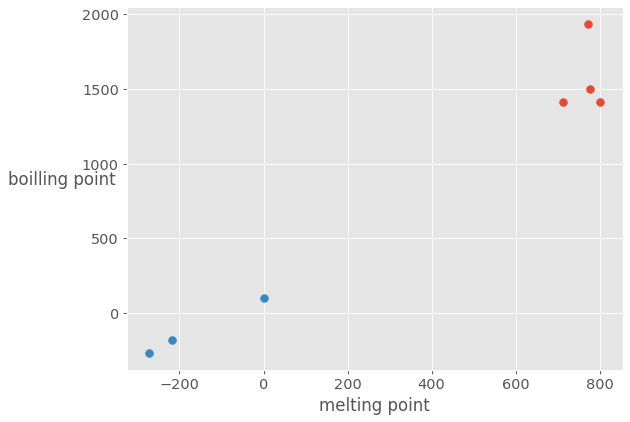

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.xlabel('melting point',size=15)
plt.ylabel('boilling point',size=15,rotation=0,labelpad=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

#[4] sklearn 모듈을 이용한 k-NN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k=int(input('원하는 k값을 입력해주세요>>'))

kn=KNeighborsClassifier(n_neighbors=k)

kn.fit(data,label)

kn.score([[318,1388],[-210,-195.8],[-56.58,-78.5]],[0,1,1])

원하는 k값을 입력해주세요>>3


1.0

In [16]:
kn.predict([[318,1388],[-210,-195.8],[-56.58,-78.5]])

array([0, 1, 1])

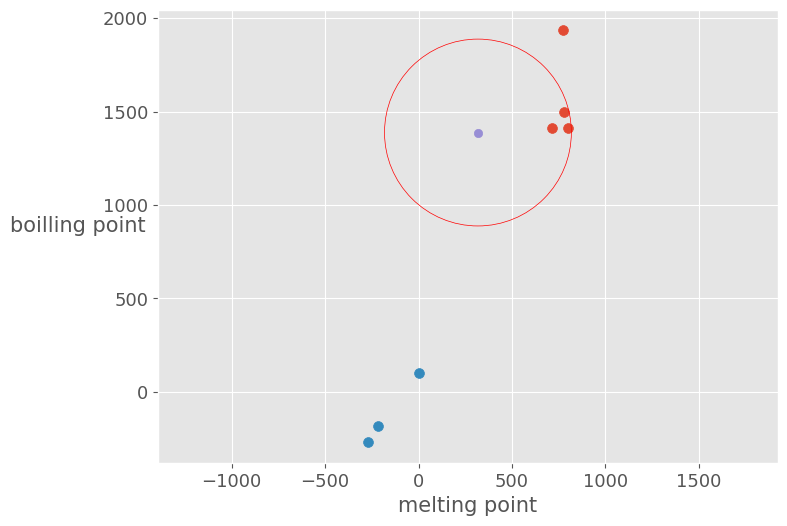

In [17]:
import matplotlib.patches as patches

plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=100)
plt.axis('equal')
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.scatter(318,1388)     
plt.xlabel('melting point',size=15)
plt.ylabel('boilling point',size=15,rotation=0,labelpad=18)
plt.xticks(size=13)
plt.yticks(size=13)

shp=patches.Circle((318,1388), radius=500, color='r',fill=False,)
plt.gca().add_patch(shp)

plt.show()

#[5] k-NN 모델의 한계1 (데이터 구성)

In [30]:
a=int(input("다이아몬드의 끓는점을 입력해주세요>>>"))
b=int(input("다이아몬드의 녹는점을 입력해주세요>>>"))
kn.predict([[a,b]])

다이아몬드의 끓는점을 입력해주세요>>>3550
다이아몬드의 녹는점을 입력해주세요>>>4827


array([0])

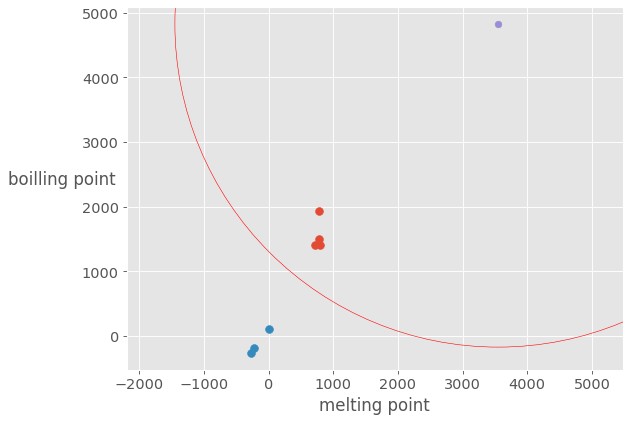

In [32]:
import matplotlib.patches as patches

plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=80)
plt.axis('equal')
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.scatter(a,b)
plt.xlabel('melting point',size=15)
plt.ylabel('boilling point',size=15,rotation=0,labelpad=18)
plt.xticks(size=13)
plt.yticks(size=13)

shp=patches.Circle((a,b), radius=5000, color='r',fill=False,)
plt.gca().add_patch(shp)

plt.show()

#[6] k-NN 모델의 한계2 (유클리드 거리)

In [33]:
kn=KNeighborsClassifier(n_neighbors=7)

kn.fit(data,label)

kn.score(data,label)

0.5714285714285714

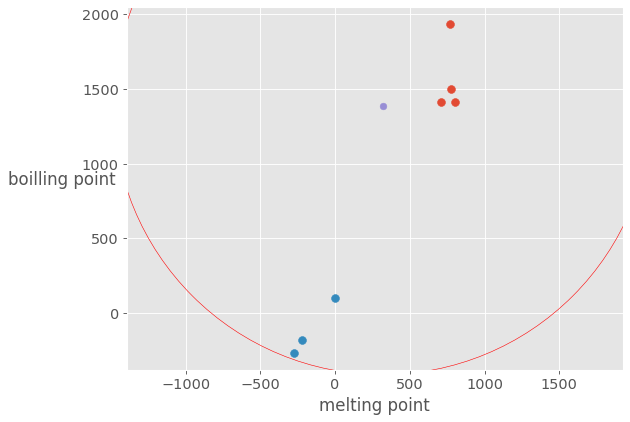

In [21]:
import matplotlib.patches as patches

plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=80)
plt.axis('equal')
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.scatter(318,1388)
plt.xlabel('melting point',size=15)
plt.ylabel('boilling point',size=15,rotation=0,labelpad=18)
plt.xticks(size=13)
plt.yticks(size=13)

shp=patches.Circle((318,1388), radius=1800, color='r',fill=False,)
plt.gca().add_patch(shp)

plt.show()